# Project: **Multivariate Root Solving** in **YRoots package by tylerjarvis**

## Group members
* Matthew Lehmann - Contributions: Writing the introduction, writing the test cases for 'breaking' the program, writing conclusions and open questions
* Reilly Richards - Contributions: Writing the introduction, writing method section, writing conclusions and open questions
* Siyu Yao - Contributions: Chose this topic for individual project, explained the concepts of the package to the team, aided in method, conclusions and open questions writing
* Erik Rhodes - Contributions: Writing the introduction, aided in writing test cases for 'breaking' the program, writing conclusions and open questions


## Introduction

The purpose of this project is to take a deeper look at the YRoots package (tylerjarvis) and its effectiveness at finding common zeros within a multivariate system of equations. When considering this package, its important to recognize that the YRoots pacakage is looking for $x, y, z$, etc. values where both of the unique multiple variable functions equal 0. A lot of these types of packages are generally applied in machine learning, optimization, and data analyst environments and are, in general, a much broader and more practical use of 'root finding'. As compared to applying things like Newton's method on single, one variable functions. In this project however, we will try to push the YRoots function to its limits based on the assumptions it uses and its performance for different functions. 

Essentially, the goal will be to break the program and show its limitations to hopefully give the reader a better understanding of the real purpose of this package. In 'breaking' the package, we should aid in showing where these principles can and cannot be used. The first example will use two multivariable functions f and g: 
\begin{equation}
f(x,y) = \sin(xy) + x\ln(y+3) - x^{2} + \frac{1}{y-4}
\end{equation}
\begin{equation}
g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6
\end{equation}

The way YRoots operates requires a general knowledge of the area in which the roots exist. Sort of similar to Newton's method from class,  This is going to be an assumption that will be pushed to the limit later in the project to see how limiting it is on the software. But for now, it is known that these two functions share values on the interval 

\begin{equation}
    -1 \leq X \leq 0
\end{equation}
\begin{equation}
    -2 \leq Y \leq 1
\end{equation}

In order to download the YRoots package, clone the repository at 'git clone https://github.com/tylerjarvis/RootFinding.git' then 'pip install -e ./RootFinding' so that you have the appropriate python package. Simply import the yroots package within your python script and you will have access to the package. Let's take a look at this first example.


Percent Finished: 100%                                                  
Total intervals checked was 85
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [ 8.2353 83.5294  0.      8.2353  0.    ]


<Figure size 3600x2400 with 0 Axes>

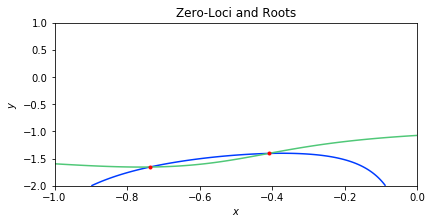

CPU times: user 1.07 s, sys: 77.6 ms, total: 1.15 s
Wall time: 4.89 s
[[-0.410034   -1.40471685]
 [-0.73720226 -1.65461673]]


In [1]:
#imports
import numpy as np
import yroots as yr

#plotting tools
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#define the functions
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6

#search domain bounds
a = [-1,-2] #lower bounds on x and y
b = [0,1] #upper bounds on x and y


# compute the roots and time the process
%time roots = yr.solve([f,g], a, b, plot=True)

print(roots)

So when we look at this plot, it's interesting to note that the values of the $f(x,y)$ and $g(x,y)$ functions are not shown. Rather, the lines appear to represent the program searching for the common roots. Which would really be an incredibly interesting look root finding algorithms being used underneath the hood of the program. 

Now let's check the accuracy of the root finding algorithm in this example before we move on to the methods section. Again, the purpose of this example was to find x and y values that result in the two multivariable functions equaling 0. The first root is at $x = -0.410034$ and $y = -1.40471685$ as reported in the printed section above. The other root is located at $x = -0.73720226$ and $y = -1.65461673$. 


\begin{equation}
    f(-0.410034,-1.40471685) = \sin(0.5759816689) - 0.1915068898 - 0.1681278812 - 0.1850235688 
\end{equation}
   
\begin{equation}
    \therefore f(-0.410034,-1.40471685) = -2.3E-9
\end{equation}

\begin{equation}
    g(-0.410034,-1.40471685) = \cos(-1.727945007) + 5.746468647 + 0.410034 - 6 
\end{equation}

\begin{equation}
    \therefore g(-0.410034,-1.40471685) = -1.51033E-8
\end{equation}

\begin{equation}
    f(-0.73720226,-1.65461673) = \sin(1.219787193) - 0.2187123788 - 0.5434671721 - 0.1768466454 
\end{equation}

\begin{equation}
    \therefore f(-0.73720226,-1.65461673) = 8.53487E-9
\end{equation}

\begin{equation}
    g(-0.73720226,-1.65461673) = -0.8689255959 + 6.131723374 + 0.73720226 - 6
\end{equation}

\begin{equation}
    \therefore g(-0.73720226,-1.65461673) = 3.82591E-8
\end{equation}

Therefore, we can see that the value of both of the functions at each set of x and y values is 0 to a decent approximation. Hopefully this also helps illustrate the true purpose of the YRoots package, and this example should help make it clear how exactly the package can be used. So now, the question is, where exactly do these kinds of multivariate functions really come into place? Well the answer is that there are plenty of methods that could use this sort of package. Most of them are computer science and physics related and will now be discussed in the following section. 

## Methods
So where does this sort of tool come in handy? That is to say, where exactly is it useful to solve for common roots between systems of multivariate equations? Well, the answer includes, machine learning, general robotics (kinematics, motion planning, collision detection, etc), computer vision, and more. An interesting example of where the roots of a multivariate system of equations comes into play is from this paper: http://web.cs.iastate.edu/~cs577/handouts/polysystem.pdf by Yan-Bin Jia. Consider the lever arm construction pictured here

<img src='images/lever.png' align='center'>

With a coordinate system setup at the first joint, we can see that the position of the 'hand' of the entire fulcrum is dependent on the orientation angles $\theta_{1}$ and $\theta_{2}$. Therefore, we can determine the location of the end effector using the an equation of the form

<img src='images/eq.png' align='center'>

Where the functions $x$ and $y$ are both dependent on $\theta_{1}$ and $\theta_{2}$. It's a pretty simple example showing where a method like YRoots can prove to be useful, but it should do point out how simple it is to come up with situations that depend on a multivariate system of equations. These sorts of equations come up quite often in fields like machine learning, with the concept of reward functions that try to teach AI how to act, and in physics based examples like this one.

One obvious question that you may now have is, can this YRoots package be applied to more than two equations then? The answer, so far as we can tell from the implementations we've ran with the program, is no. Which is kind of unfortunate considering the fact that it's now easy to envision a scenario where more than 2 equations are needed to describe a system (like a lot of aircraft dynamics problems which require up to 15 equations at a time). But in the context of YRoots, we will stick to using only two equations and finding the common zeros of two equations at a time. 

When it comes to some specific methods working behind the scenes in the YRoots package, things like the 'constant_term_check' are applied, which appears to be referencing the rational roots test in which the software will look for initial guesses that could point it closer to the actual common roots of each function. The Macaulay root theorem is also something utilized by the program behind the scenes, which is a sort of tool specifically helpful when looking at common roots between multivariate polynomials. Each they all operate similar to Newton's method in their search for common roots of a multivariate system.

From this point forward, we will now go into pushing the YRoots, and thus maybe our computers, a little harder than the first example. Hopefully we can break the program or illustrate an ill-conditioned example where the software package starts to lose accuracy, lack in performance, or just fail altogether. Based on the assumptions we've already discussed with the intervals used in the examples above. One way to hinder the program's performance should be clear.
## Results and interpretation

The first thing we want to test is expanding the domain on which we search for common roots for a specific pair of multivariate functions. A good example to start off will be the original one at the top of this notebook. We have two unique functions, $f$ and $g$, that depend on $x$ and $y$, and we know that roots exist on the given domain for both of these variables (see introduction). 

However, if we expand this domain of values to search on, how drastically will the performance of the YRoots package change? Will it be a significant increase in machine processing time the larger and larger the domain gets? Or is the YRoots even capable of handling a larger initial guess for roots? We can find out here. Let's change the x and y interval to $-2 \leq X \leq 2$ and $-2 \leq Y \leq 2$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/jovyan/RootFinding/yroots/subdivision.py:469: RuntimeWarning: invalid value encountered in subtract
  coeff2[slice_top(coeff)] -= coeff
/home/jovyan/RootFinding/yroots/IntervalChecks.py:789: RuntimeWarning: invalid value encountered in greater
  if not np.all(extreme_points > 0) and not np.all(extreme_points < 0):
/home/jovyan/RootFinding/yroots/IntervalChecks.py:789: RuntimeWarning: invalid value encountered in less
  if not np.all(extreme_points > 0) and not np.all(extreme_points < 0):
/home/jovyan/RootFinding/yroots/IntervalChecks.py:729: RuntimeWarning: invalid value encountered in double_scalars
  eval_func = lambda x,y: c0 + c1*x + c2*y + c3*(2*x**2-1) + c4*x*y + c5*(2*y**2-1)
/home/jovyan/RootFinding/yroots/IntervalChecks.py:726: RuntimeWarning: invalid value encountered in double_scalars
  other_sum = np.sum(np.abs(test_coeff)) - np.sum(np.abs([c0,c

Percent Finished: 100%                                                  
Total intervals checked was 160
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [47.5   49.375  0.     3.125  0.   ]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


<Figure size 3600x2400 with 0 Axes>

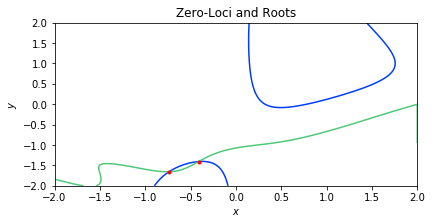

CPU times: user 1.55 s, sys: 58.9 ms, total: 1.61 s
Wall time: 6.9 s
[[-0.410034   -1.40471685]
 [-0.73720226 -1.65461673]]


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#define the functions
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6

#search domain bounds
a = [-2,-2] #lower bounds on x and y
b = [2,2] #upper bounds on x and y


# compute the roots and time the process
%time roots = yr.solve([f,g], a, b, plot=True)

print(roots)

So, notice that we start getting some warning messages from the program. We have mostly runtime warnings, and we can clearly see a few differences between this run, and the previous run when $-1 \leq X \leq 0$ and $-2 \leq Y \leq 1$. 

- The total intervals checked jumped from 85 to 160
- The user CPU time jumped from roughly 999 ms to roughly 1.59s (depending on each running of the jupyter notebook)
- The total time jumped from roughly 1.07s to roughly 1.65s (depending on each running of the jupyter notebook)
- The wall time jumped from roughly 4.58s to roughly 7.01s: This seems like the most significant one that actually represents how long the notebook took to run this cell

However, the roots were ultimately still found; and they actually matched the previous examples roots exactly. So even though we got some runtime errors and the machine performance slowed by roughly 3 seconds, the answers we got were still accurate. However, the change in the domain of our guess was not drastic at all, and we already started getting warnings from the YRoots program. Therefore it seems like we may have found one of the limits of the package. The initial guess for where the common roots of the system exist may need to be very close to the actual roots when using this software. 

Let's go ahead and try jumping decently higher when it comes to the domain we are looking at. We will jump from $-1 \leq X \leq 0$ and $-2 \leq Y \leq 1$ to $-5 \leq X \leq 5$ and $-5 \leq Y \leq 5$

In [ ]:
#define the functions
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6

#search domain bounds
a = [-5,-5] #lower bounds on x and y
b = [5,5] #upper bounds on x and y


# compute the roots and time the process
%time roots = yr.solve([f,g], a, b, plot=True)

print(roots)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Percent Finished: 0.41%       

And once we expand the domain slightly further, the program fails to even finish executing and hangs on roughly 0.41% completion. So it looks like we successfully broke the code and can now point out a very important feature in this software tool. When using the tool, you need to make sure that the relative position of the common roots of your bivariate system is known. 

Now, what exactly does this mean? Well, it's similar to Newton's method. Newton's method is incredibly powerful in root solving for specific functions when the initial guess of the root is not extremely far away from the actual root (assuming the function has multiple local minima or maxima or has near zero slope at some points, etc). But once the initial guess is significantly far away from the actual root, the method struggles in performance and at times, may not even be able to find a true zero. 

Thus, when we consider using the YRoots package for finding common roots between to multivariate functions, it is important that we know the general behavior of the functions and can approximate the location of their zeros. 

Well... how easy is that exactly? If we are dealing with multiple variable functions it seems like it may be difficult to understand the behavior of the two functions intuitively. This will probably be one of the open questions we leave for the next section. 

For now, let's consider what an ill-conditioned use of the YRoots package would look like. Imagine, for some reason, one your multivariate functions is a product of a bunch of other multivariate functions. This is one of the examples YRoots warns about and shows another pitfall in the program. Consider the following functions:

\begin{equation}
    f(x,y) = y^{2}\bigg(4y^{2}-\frac{i}{10}\bigg)-x^{2}(4x^{2}-1)
\end{equation}

\begin{equation}
    g(x,y) = 256(x^{2}+y{2})^{2} + 288(x^{2} + y^{2}) - 512(x^{3}-3xy^{2}) - 27
\end{equation}

When we vary the input i from 0 to 10, and multiply the function together each time we change i, this produces a strangely ill-conditioned situation for the YRoots package. Once we create this product, we move on to try and find the common roots that it shares with the $g(x,y)$ function.

In [ ]:
#functions
f = lambda x,y: np.prod([y**2*(4*y**2-i/10)-x**2*(4*x**2-1) for i in range(11)],axis=0)
g = lambda x,y: 256*(x**2+y**2)**2+288*(x**2+y**2)-512*(x**3-3*x*y**2)-27
#search domain
a = [-1,-1] #lower
b = [1,1] #upper
#time
%time roots = yr.solve([f,g], a, b)
roots = yr.solve([f,g], a, b, plot=True)

<img src='images/run.png' align='left'>

Notice that the run time shoots up to roughly 5 minutes when trying to run this scenario. Plotting the image took another 3 minutes by the way, so we can clearly see that this specific situation is an ill-conditioned use of the YRoots program. And moreover, all of the roots that are marked on the image are not accurate, since, apparently according to this paper https://link.springer.com/article/10.1007/s00211-014-0635-z there are not this many common roots between the two functions to begin with. Now, this seems like an extremely specific situation in which you would push YRoots to the limit. But perhaps there is a common use for product functions like $f(x)$. This will be one of our open questions coming in the following section.

## Conclusions and open questions

Overall, YRoots is a very intriguing package that has the ability to find common roots between two multivariate functions on a specific domain. This poses an interesting asset for machine learning, robotics, and computer vision fields of research, while the entire YRoots package can even be applied to things like the optimization of surfaces (finding common roots of derivatives). 

However, the performance of the package is ultimately limited to the users knowledge of the multivariate functions they are considering. The general position of the common roots should be known and applied to the bounds of the yr.solve input. Otherwise, the program may take a much longer amount of time to complete, or, as we saw in our second example, it may never complete at all. 

There also appears to be some interesting functions that give the program trouble like we saw in the third example in this project, but these may be limited to highly specific examples. So whether or not they are something that should be constantly worried about when using the package is still unclear. 

## Questions
- What exactly is it about the $f(x,y)$ function used in the third example of this project that gives the program such a difficult time finding the common roots with the $g(x,y)$ function given?
- Where did this $g(x,y)$ function come from in the third example? (As a follow up to the previous question)
- How effective are things like the 'constant_term_check', which seems to represent the rational roots test for finding initial guesses for roots, the 'quadratic_check', and 'base_case' methods?
- Is the general position of a set of common roots between multivariate functions easy to know? Is it something that a computer scientist or researcher will be aware of before going into using a package like YRoots?